## Group members:
### Shir Gonen
### Koral Yehezkia
### Eden Cohen
### Noa Bar Nov

# EDA Project - Laptop sales

<div>
<img src="images/dataset-cover.png" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)    
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

We'll work with a marketing of Laptops dataset, taken from [Flipkaet](flipkart.com)

Based on the example [here](https://www.kaggle.com/jennifercrockett/marketing-analytics-eda-task-final)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data1.csv'
data_comp = pd.read_csv(url)

In [3]:
data = data_comp.copy()

In [4]:
data.shape

(896, 23)

In [5]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


# Wrangling data

#### 1.1 Fix columns

In [6]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

All of the columns seems OK

#### 1.2 Missing values

In [7]:
data.isnull().sum().sort_values(ascending=False)

brand              0
weight             0
ratings            0
star_rating        0
discount           0
old_price          0
latest_price       0
msoffice           0
Touchscreen        0
warranty           0
display_size       0
graphic_card_gb    0
model              0
os_bit             0
os                 0
hdd                0
ssd                0
ram_type           0
ram_gb             0
processor_gnrtn    0
processor_name     0
processor_brand    0
reviews            0
dtype: int64

Replacing missing to NaN's for conveniency

In [8]:
data = data.replace('Missing' , np.nan)

In [9]:
data.isnull().sum().sort_values(ascending=False)

display_size       332
processor_gnrtn    239
model               95
brand                0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
warranty             0
graphic_card_gb      0
weight               0
os_bit               0
os                   0
hdd                  0
ssd                  0
ram_type             0
ram_gb               0
processor_name       0
processor_brand      0
reviews              0
dtype: int64

##### Fixing processor generator column

In [10]:
data['processor_gnrtn'].isnull().sum()

239

<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

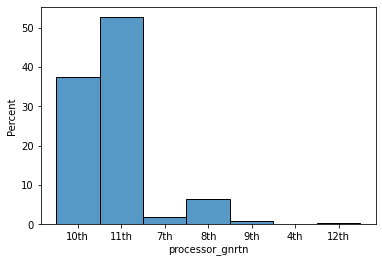

In [11]:
sns.histplot(data = data, x='processor_gnrtn', stat = 'percent')

We have dicided to ignore the missing values because there are 26.26% missing valuse

##### Fixing model column

In [12]:
data['model'].isnull().sum()

95

In [13]:
data.model.unique()

array(['A6-9225', 'Ideapad', 'PURA', 'APU', 'Athlon', 'Aspire',
       'ExpertBook', nan, 'v15', 'VivoBook', 'EeeBook', 'Nitro', 'Cosmos',
       'x360', 'IdeaPad', 'Celeron', '15q', '250-G6', 'Vostro', '15',
       'Pavilion', 'Book', 'Inspiron', 'INBook', 'ThinkPad', 'Chromebook',
       'Commercial', '14s', 'INSPIRON', 'V15', '15s', '3000', 'Notebook',
       'Vivo', 'DA', 'Insprion', 'Travelmate', '14a', 'Predator', 'Spin',
       'Swift', 'ROG', 'XPS', 'Omen', 'Surface', 't.book', 'Yoga', 'Gram',
       'Spectre', 'VivoBook14', 'TUF', 'Book(Slim)', 'Pro', 'PureBook',
       'ASUS', 'Katana', 'GF63', 'Thinkbook', 'Intel', 'G15', 'ZenBook',
       'Legion', 'Modern', 'ThinkBook', 'Prestige', 'Zenbook', 'MacBook',
       'Sword', 'Envy', 'SE', 'ConceptD', 'HP', 'DELL', 'X390', 'Thinpad',
       'Inpiron', 'GAMING', 'GS', '430', 'Liber', 'F17', 'B50-70', 'GE76',
       'GP65', 'GP76', '250', '3511', 'G3', 'GS66', 'X1', 'GF65',
       'Stealth', 'Zephyrus', 'Summit', 'OMEN', 'Pulse', '

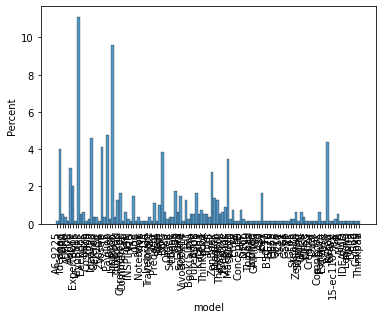

In [14]:
sns.histplot(data = data, x= 'model', stat = 'percent')
plt.xlabel("model")
plt.xticks(rotation=90)
plt.show()

We have dicided to ignore the missing values because there are too many selecting options and we sont want to delete 10% of our data

##### fixing display size coloumn

In [15]:
data['display_size'].isnull().sum()

332

<AxesSubplot:xlabel='display_size', ylabel='Percent'>

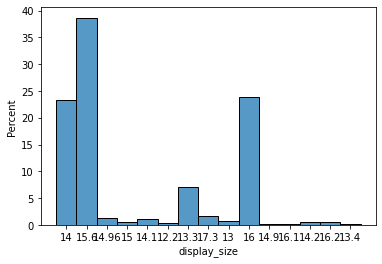

In [16]:
sns.histplot(data = data, x= 'display_size', stat = 'percent')

We have dicided to ignore the missing values because there are 33.33% missing valuse

### 1.3 Transformations

##### Fixing ram_gb column

In [17]:
data.ram_gb.unique()

array(['4 GB GB', '8 GB GB', '32 GB GB', '16 GB GB'], dtype=object)

In [18]:
data['ram_gb'] =data['ram_gb'].replace({'4 GB GB':4,'8 GB GB':8,'16 GB GB':16,'32 GB GB':32})
data.ram_gb.unique()

array([ 4,  8, 32, 16], dtype=int64)

##### Fixing processor_gnrtn column

In [19]:
data.processor_gnrtn.unique()

array(['10th', nan, '11th', '7th', '8th', '9th', '4th', '12th'],
      dtype=object)

In [20]:
data['processor_gnrtn'] =data['processor_gnrtn'].replace({'10th':10,'11th':11,'7th':7,'8th':8,'8th':8,'9th':9,'12th':12,'4th':4})
data.processor_gnrtn.unique()

array([10., nan, 11.,  7.,  8.,  9.,  4., 12.])

##### Fixing ssd column

In [21]:
data.ssd.unique()

array(['0 GB', '128 GB', '256 GB', '32 GB', '512 GB', '1024 GB',
       '2048 GB', '3072 GB'], dtype=object)

In [22]:
data['ssd'] =data['ssd'].replace({'0 GB':0,'128 GB':128,'256 GB':256,'32 GB':32,'512 GB':512,'1024 GB':1024,'2048 GB':2048,'3072 GB':3072})
data.ssd.unique()

array([   0,  128,  256,   32,  512, 1024, 2048, 3072], dtype=int64)

##### Fixing hdd column

In [23]:
data.hdd.unique()

array(['1024 GB', '512 GB', '0 GB', '2048 GB'], dtype=object)

In [24]:
data['hdd'] =data['hdd'].replace({'0 GB':0,'512 GB':512,'1024 GB':1024,'2048 GB':2048})
data.hdd.unique()

array([1024,  512,    0, 2048], dtype=int64)

##### Fixing os_bit column

In [25]:
data.os_bit.unique()

array(['64-bit', '32-bit'], dtype=object)

In [26]:
data['os_bit'] =data['os_bit'].replace({'64-bit':64,'32-bit':32})
data.os_bit.unique()

array([64, 32], dtype=int64)

##### Fixing display_size column

In [27]:
data.display_size.unique()

array([nan, '14', '15.6', '14.96', '15', '14.1', '12.2', '13.3', '17.3',
       '13', '16', '14.9', '16.1', '14.2', '16.2', '13.4'], dtype=object)

In [28]:
data['display_size'] = data['display_size'].astype(float)

In [29]:
data.display_size.info()

<class 'pandas.core.series.Series'>
RangeIndex: 896 entries, 0 to 895
Series name: display_size
Non-Null Count  Dtype  
--------------  -----  
564 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


##### Fixing Touchscreen column

In [30]:
data['Touchscreen'] = data['Touchscreen'].replace({'Yes':1,'No':0})

In [31]:
data.Touchscreen.unique()

array([0, 1], dtype=int64)

##### Fixing msoffice column

In [32]:
data['msoffice'] = data['msoffice'].replace({'Yes':1,'No':0})

In [33]:
data.msoffice.unique()

array([0, 1], dtype=int64)

##### Fixing weight column

In [34]:
data.weight.unique()

array(['ThinNlight', 'Casual', 'Gaming'], dtype=object)

In [35]:
data['weight'] = data['weight'].replace({'ThinNlight':1,'Casual':2,'Gaming':3})

In [36]:
data.weight.unique()

array([1, 2, 3], dtype=int64)

Lets look at our data after the changes:

In [69]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10.0,4,DDR4,0,1024,Windows,...,NaN,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10.0,4,DDR4,0,512,Windows,...,NaN,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,256,0,Windows,...,NaN,0,0,0,24990,33490,25,3.7,1657,234


#### 1.4 Noisy data - outliers

We choose only the numeric data because we want to see it in boxplot

Select only numeric columns:

In [70]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn    float64
ram_gb               int64
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight               int64
display_size       float64
warranty             int64
Touchscreen          int64
msoffice             int64
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [71]:
numeric_features = ['processor_gnrtn','ram_gb','ssd','hdd','os_bit','weight','display_size','Touchscreen','msoffice','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

creating 2 melted data frames - האם נדרש???
1. by brand
2. by model

In [72]:
melted_by_brand = pd.melt(data, id_vars = 'brand', value_vars = numeric_features)
melted_by_brand

,brand,variable,value
0,Lenovo,processor_gnrtn,10.0
1,Lenovo,processor_gnrtn,10.0
2,Avita,processor_gnrtn,10.0
3,Avita,processor_gnrtn,10.0
4,Avita,processor_gnrtn,10.0
...,...,...,...
14331,ASUS,reviews,0.0
14332,ASUS,reviews,0.0
14333,ASUS,reviews,0.0
14334,SAMSUNG,reviews,0.0


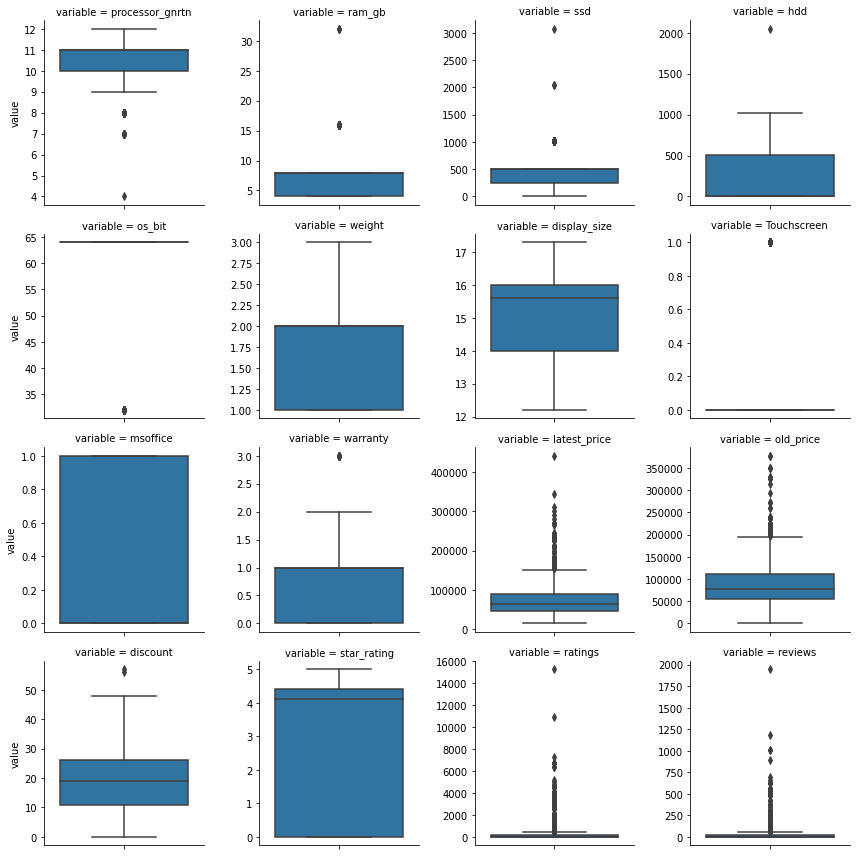

In [73]:
g = sns.FacetGrid(data =melted_by_brand, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

יש מסקנות שאפשר להסיק מכאן?
<div>
<img src="images/red.png" width="100"/>
</div>

In [74]:
melted_by_model = pd.melt(data, id_vars = 'model', value_vars = numeric_features)
melted_by_model

,model,variable,value
0,A6-9225,processor_gnrtn,10.0
1,Ideapad,processor_gnrtn,10.0
2,PURA,processor_gnrtn,10.0
3,PURA,processor_gnrtn,10.0
4,PURA,processor_gnrtn,10.0
...,...,...,...
14331,ROG,reviews,0.0
14332,Ryzen,reviews,0.0
14333,Ryzen,reviews,0.0
14334,Galaxy,reviews,0.0


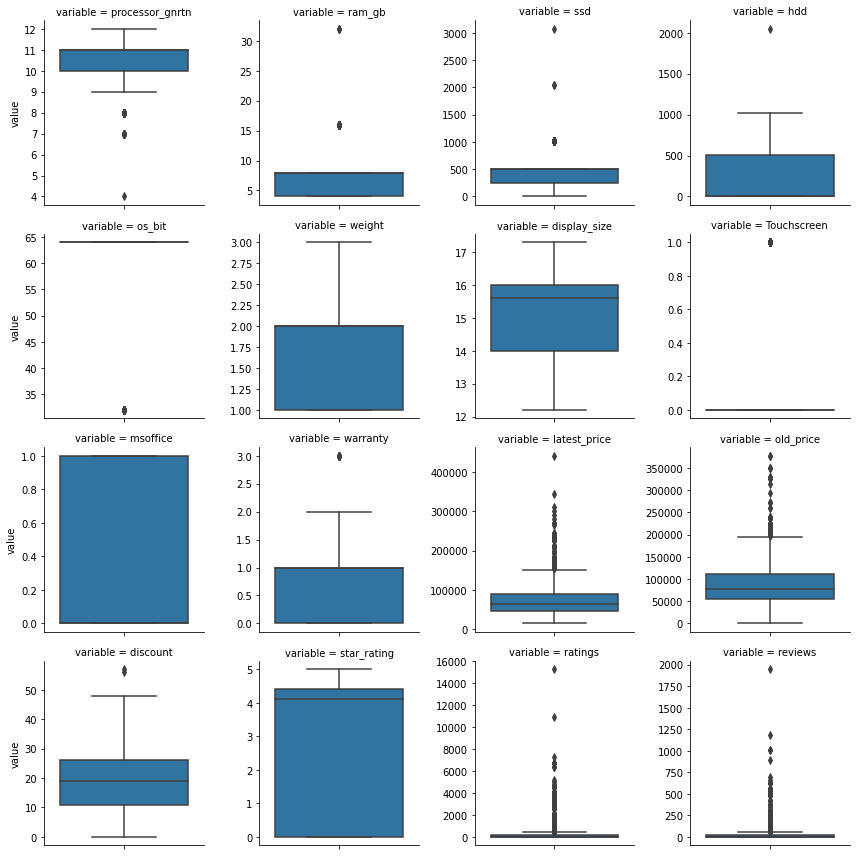

In [75]:
g = sns.FacetGrid(data =melted_by_model, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

#### 2.0 Understanding the data

Lets look at our data visually and see if the data is ready to be correlated (יש מצב שהמצאתי מילה)

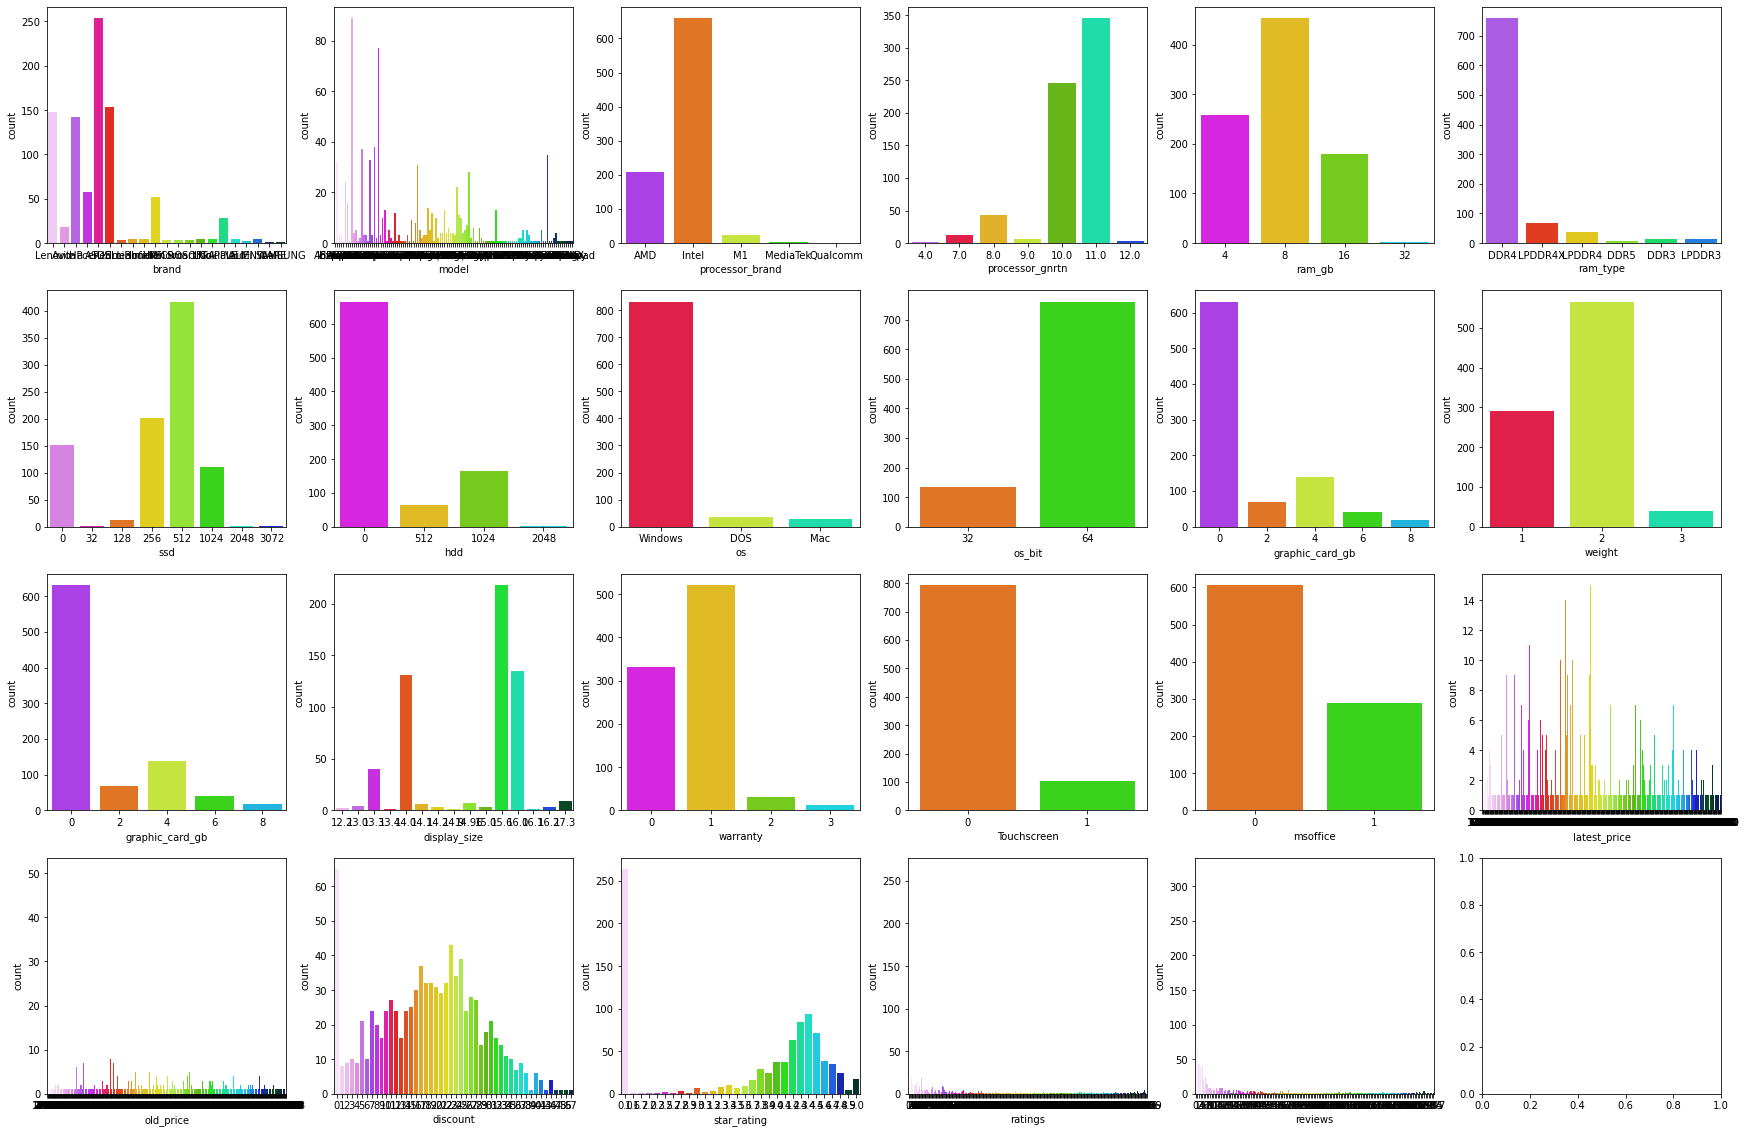

In [77]:
fig, axes = plt.subplots(4,6, figsize=(30,20))
sns.countplot(data = data, x = 'brand', ax = axes[0,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'model', ax = axes[0,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'processor_brand', ax = axes[0,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'processor_gnrtn', ax = axes[0,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ram_gb', ax = axes[0,4], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ram_type', ax = axes[0,5], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ssd', ax = axes[1,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'hdd', ax = axes[1,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'os', ax = axes[1,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'os_bit', ax = axes[1,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'graphic_card_gb', ax = axes[1,4], palette='gist_ncar_r')
sns.countplot(data = data, x = 'weight', ax = axes[1,5], palette='gist_ncar_r')
sns.countplot(data = data, x = 'graphic_card_gb', ax = axes[2,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'display_size', ax = axes[2,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'warranty', ax = axes[2,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'Touchscreen', ax = axes[2,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'msoffice', ax = axes[2,4], palette='gist_ncar_r')
sns.countplot(data = data, x = 'latest_price', ax = axes[2,5], palette='gist_ncar_r')
sns.countplot(data = data, x = 'old_price', ax = axes[3,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'discount', ax = axes[3,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'star_rating', ax = axes[3,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ratings', ax = axes[3,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'reviews', ax = axes[3,4], palette='gist_ncar_r')
plt.show()

we can see from here 2 things:
1. ssd and graphic_card_gb has 600 laptops with 0gb - which not make scense (לבדוק אנגלית).
2. star ratings contains more than 250 '0 stars' it may be because it is missind and not because people actually gave 0 stars. - we will check later the correlation between stars and rating/reviews.

ולראות איך מורידים את הגרף האחרון!!!
<div>
<img src="images/red.png" width="100"/>
</div>

#### 3.0 Correlations

Let's divide the information into numerical and categorical variables.

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            801 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  657 non-null    float64
 5   ram_gb           896 non-null    int64  
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    int64  
 13  display_size     564 non-null    float64
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    int64  
 16  msoffice         896 non-null    int64  
 17  latest_price    

In [79]:
categorial_features = ['brand', 'model', 'processor_brand','processor_name','ram_type','os']

In [111]:
numeric_features

['processor_gnrtn',
 'ram_gb',
 'ssd',
 'hdd',
 'os_bit',
 'weight',
 'display_size',
 'Touchscreen',
 'msoffice',
 'warranty',
 'latest_price',
 'old_price',
 'discount',
 'star_rating',
 'ratings',
 'reviews']

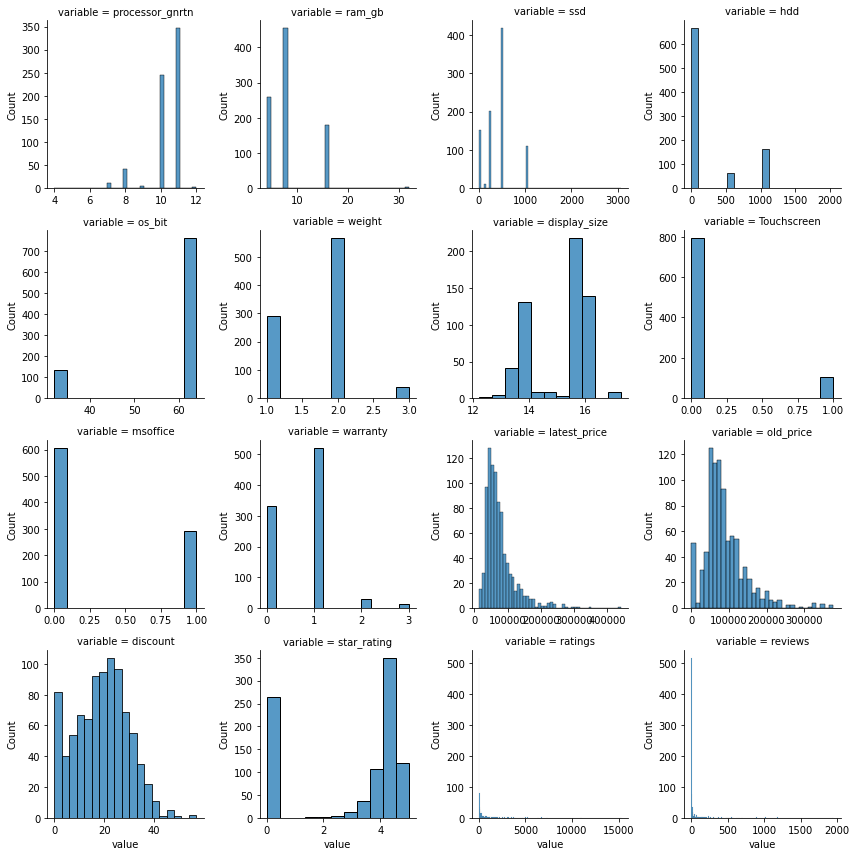

In [80]:
g = sns.FacetGrid(data =melted_by_brand , col="variable", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value")
plt.show()

לחשוב בכל מפת חום איזו שיטת קורלציה היא הנכונה!
בינתיים עשינו בכולם kendall
<div>
<img src="images/red.png" width="100"/>
</div>

#### 3.1 By model

In [81]:
data_groupby_model = data.groupby('model')[numeric_features].mean()
data_groupby_model

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
model,,,,,,,,,,,,,,,,
14a,NaN,4.000000,0.000000,512.000000,64.000000,2.000000,NaN,0.000000,0.000000,0.000000,26470.000000,31532.000000,16.000000,3.600000,232.000000,23.000000
14s,10.5,5.600000,358.400000,204.800000,64.000000,1.000000,NaN,0.000000,0.800000,0.800000,49092.000000,57970.800000,13.800000,4.200000,1732.600000,186.000000
15,10.0,10.666667,298.666667,341.333333,42.666667,1.333333,15.6,0.000000,0.000000,1.000000,66307.000000,35999.333333,16.000000,2.866667,708.666667,101.333333
15-ec1105AX,NaN,8.000000,512.000000,0.000000,64.000000,2.000000,15.6,0.000000,0.000000,1.000000,58990.000000,70172.000000,15.000000,4.500000,1049.000000,134.000000
15q,7.5,5.333333,0.000000,1024.000000,64.000000,2.000000,15.6,0.000000,0.000000,0.666667,37554.000000,16730.000000,2.000000,4.133333,1242.000000,136.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zenbook,11.0,9.142857,731.428571,0.000000,59.428571,1.857143,15.0,0.714286,0.428571,0.428571,98275.714286,127847.142857,22.571429,1.271429,12.285714,2.285714
Zephyrus,11.0,11.200000,1433.600000,0.000000,44.800000,2.000000,16.0,0.000000,0.000000,1.000000,205443.800000,102994.000000,13.600000,1.860000,1.600000,0.200000
t.book,7.0,5.333333,128.000000,0.000000,64.000000,2.000000,12.2,1.000000,0.000000,0.000000,49656.666667,52662.666667,5.333333,3.633333,27.666667,6.333333


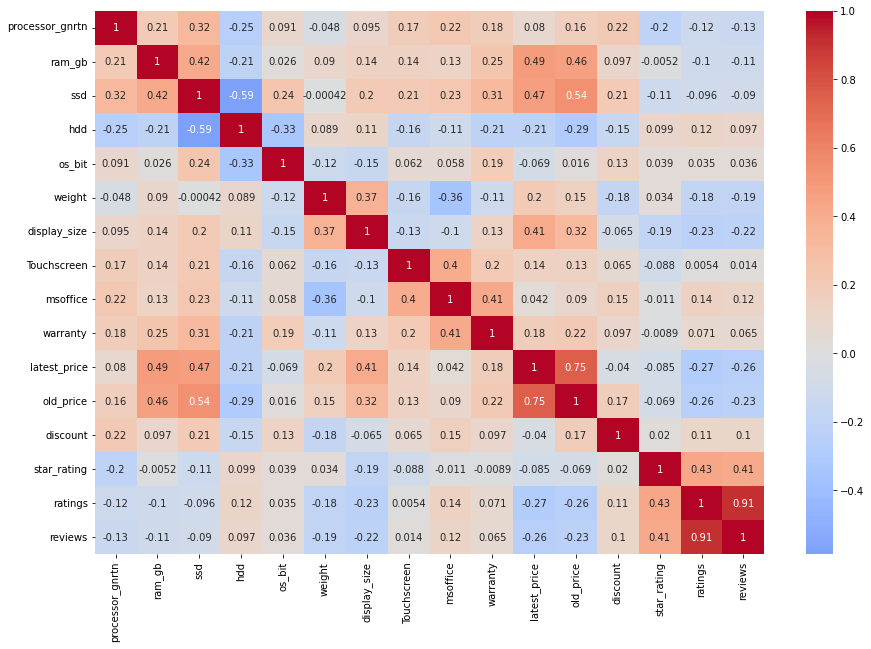

In [82]:
corrs = data_groupby_model.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

פה הייתי מתמקדת בקשר השלילי שיש בין המחירים לדירוגים - כי הרי אם הדירוגים גבוהים אז החנות רוצה להוריד פחות מחירים והיא מורידה כנראה... (הביקוש גבוה)

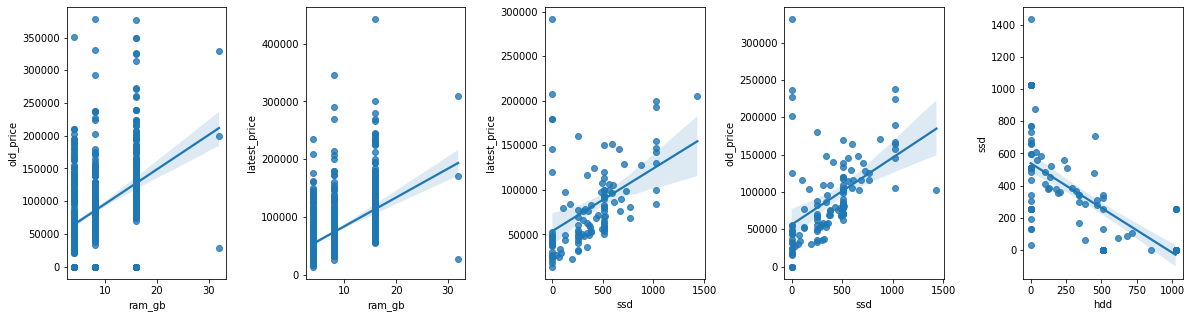

In [87]:
fig, ax = plt.subplots(1,5,figsize=(20, 5))
sns.regplot(x='ram_gb', y='old_price', data=data, ax=ax[0]) # 0.46
sns.regplot(x='ram_gb', y='latest_price', data=data, ax = ax[1]) #0.49
sns.regplot(x='ssd', y='latest_price', data=data_groupby_model, ax = ax[2]) #0.47
sns.regplot(x='ssd', y='old_price', data=data_groupby_model, ax = ax[3]) #0.54
sns.regplot(x='hdd', y='ssd', data=data_groupby_model, ax = ax[4]) #-0.59
plt.subplots_adjust(wspace = 0.5)
#לבדוק כאן איזה קובץ דאטה לשים - המקורי או הגרופבי?
#הערכים משתנים אם משנים בין הגרפים

#### 3.2 By brand

In [88]:
data_groupby_brand = data.groupby('brand')[numeric_features].mean()
data_groupby_brand

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
brand,,,,,,,,,,,,,,,,
ALIENWARE,10.000000,8.000000,0.000000,512.000000,32.000000,2.000000,15.600000,0.000000,0.000000,0.000000,257365.000000,283034.250000,8.750000,4.400000,10.000000,2.250000
APPLE,9.928571,12.428571,594.285714,0.000000,64.000000,2.000000,13.900000,0.000000,0.000000,1.000000,151707.857143,163650.000000,7.107143,4.717857,1207.535714,117.535714
ASUS,10.463415,8.377953,509.480315,223.748031,58.834646,1.885827,15.366234,0.118110,0.220472,0.606299,79221.704724,91982.964567,20.799213,2.681496,367.661417,47.440945
Avita,8.411765,7.555556,355.555556,28.444444,64.000000,1.055556,13.850000,0.000000,0.000000,0.000000,55759.111111,65595.555556,16.500000,1.805556,388.777778,57.777778
DELL,10.652893,7.792208,337.454545,362.389610,60.675325,1.512987,15.105778,0.123377,0.415584,0.655844,62029.961039,72650.714286,16.948052,2.863636,122.753247,14.181818
HP,10.414894,8.929577,432.901408,194.704225,59.492958,1.654930,15.111340,0.183099,0.584507,0.774648,71782.330986,75584.014085,12.401408,3.212676,534.478873,61.056338
Infinix,10.000000,10.000000,384.000000,0.000000,64.000000,1.250000,14.000000,0.000000,0.000000,0.000000,40865.000000,57499.000000,29.500000,4.250000,720.500000,152.250000
LG,10.600000,8.000000,307.200000,0.000000,64.000000,1.400000,NaN,0.000000,0.000000,0.000000,76190.000000,109000.000000,29.600000,1.820000,16.600000,5.400000
Lenovo,10.301724,8.216216,430.702703,179.891892,58.378378,1.736486,15.312871,0.128378,0.500000,0.851351,71924.837838,89509.662162,24.472973,2.914865,171.871622,20.432432


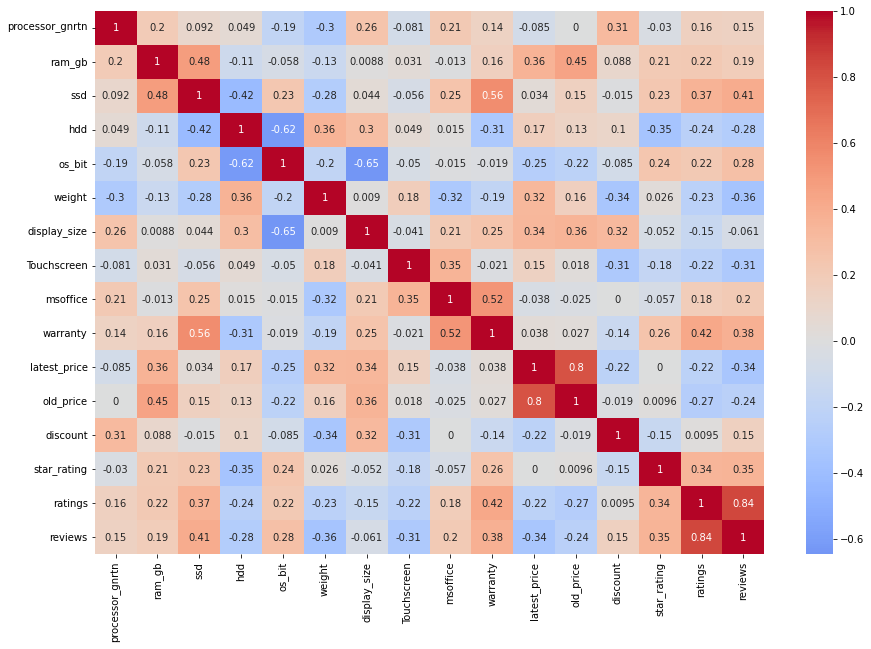

In [89]:
corrs = data_groupby_brand.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

להשלים פה את הגרפים מתחת לפי הקשרים

<AxesSubplot:xlabel='reviews', ylabel='ratings'>

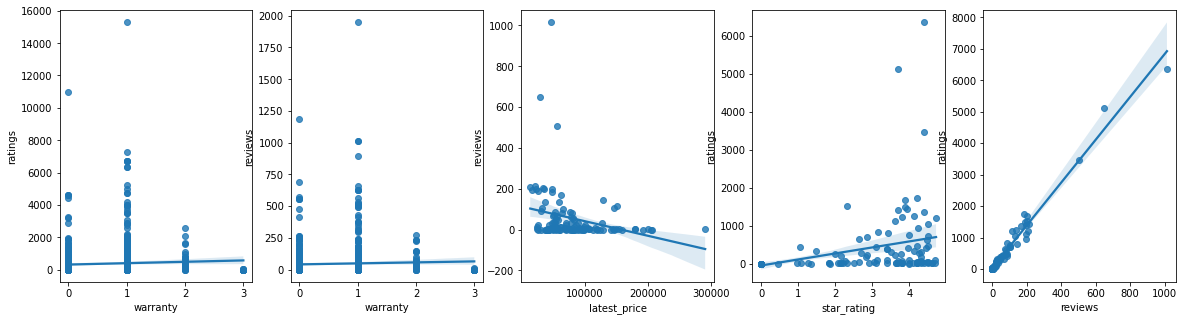

In [56]:
fig, ax = plt.subplots(1,5,figsize=(20, 5))
sns.regplot(x='warranty', y='ratings', data=data, ax=ax[0])
sns.regplot(x='warranty', y='reviews', data=data, ax = ax[1])
sns.regplot(x='latest_price', y='reviews', data=data_groupby_model, ax = ax[2])
sns.regplot(x='star_rating', y='ratings', data=data_groupby_model, ax = ax[3])
sns.regplot(x='reviews', y='ratings', data=data_groupby_model, ax = ax[4])
#פה יש יותר עבודה כדי להבין מה טוב 

#### 3.3 By processor brand

In [90]:
data_groupby_processor_brand = data.groupby('processor_brand')[numeric_features].mean()
data_groupby_processor_brand

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
processor_brand,,,,,,,,,,,,,,,,
AMD,10.000000,7.00000,527.538462,157.538462,60.153846,1.75000,15.358116,0.110577,0.360577,0.730769,72934.480769,90099.086538,20.365385,2.869231,337.062500,44.254808
Intel,10.355049,8.89697,400.096970,255.224242,58.860606,1.69697,15.114677,0.121212,0.325758,0.672727,75060.671212,85250.983333,18.401515,2.951970,320.690909,41.248485
M1,10.000000,12.50000,565.333333,0.000000,64.000000,2.00000,13.887500,0.000000,0.000000,1.000000,148156.666667,159900.000000,7.208333,4.750000,1397.875000,136.041667
MediaTek,10.000000,4.00000,0.000000,512.000000,32.000000,2.00000,NaN,0.000000,0.000000,0.000000,22823.333333,25451.000000,9.666667,3.800000,4623.000000,553.000000
Qualcomm,NaN,4.00000,0.000000,512.000000,32.000000,2.00000,NaN,0.000000,0.000000,0.000000,38990.000000,47990.000000,18.000000,0.000000,0.000000,0.000000


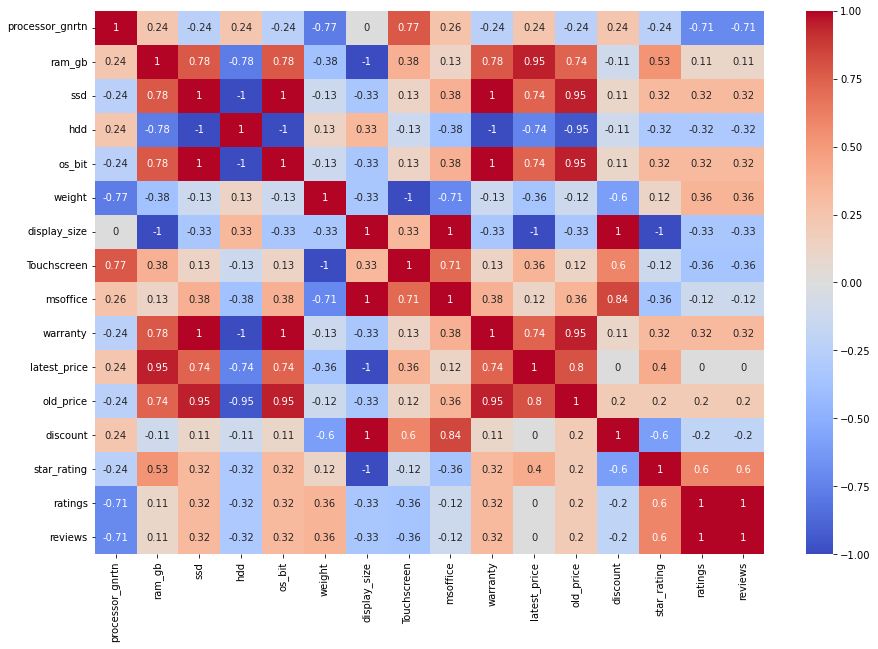

In [92]:
corrs = data_groupby_processor_brand.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

#### 3.4 By processor name

In [93]:
data_groupby_processor_name = data.groupby('processor_name')[numeric_features].mean()
data_groupby_processor_name

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
processor_name,,,,,,,,,,,,,,,,
A6-9225 Processor,10.000000,4.000000,0.000000,1024.000000,64.000000,1.000000,NaN,0.000000,0.000000,0.000000,24990.000000,32790.000000,23.000000,3.700000,63.000000,12.000000
APU Dual,10.000000,4.571429,109.714286,365.714286,59.428571,1.428571,14.000000,0.000000,0.000000,0.000000,21978.000000,23872.857143,16.714286,3.742857,1274.000000,171.571429
Athlon Dual,10.000000,18.000000,144.000000,0.000000,48.000000,2.000000,14.000000,0.000000,0.000000,0.500000,29444.500000,32329.000000,7.500000,2.100000,38.000000,6.500000
Celeron Dual,NaN,4.166667,42.666667,469.333333,49.333333,1.875000,14.800000,0.000000,0.000000,0.041667,24602.791667,30222.083333,18.000000,3.095833,966.541667,128.416667
Core,NaN,4.000000,0.000000,512.000000,32.000000,2.000000,NaN,0.000000,0.000000,0.000000,99990.000000,149999.000000,33.000000,4.500000,1336.000000,186.000000
Core i3,10.541176,6.023529,262.023529,349.364706,59.105882,1.488235,14.922857,0.070588,0.376471,0.682353,42583.964706,52200.552941,19.670588,3.308824,533.941176,67.500000
Core i5,10.300000,8.807692,407.384615,237.948718,59.589744,1.717949,15.059659,0.141026,0.371795,0.721154,74993.150641,88122.567308,18.939103,3.029167,231.355769,28.432692
Core i7,10.258929,14.928571,689.142857,96.000000,61.142857,1.848214,15.412766,0.178571,0.276786,0.723214,118975.151786,127544.580357,16.151786,2.190179,74.017857,10.482143
Core i9,10.875000,18.000000,1280.000000,0.000000,56.000000,2.125000,15.680000,0.125000,0.000000,0.625000,240116.000000,225343.500000,14.125000,1.225000,1.125000,0.250000


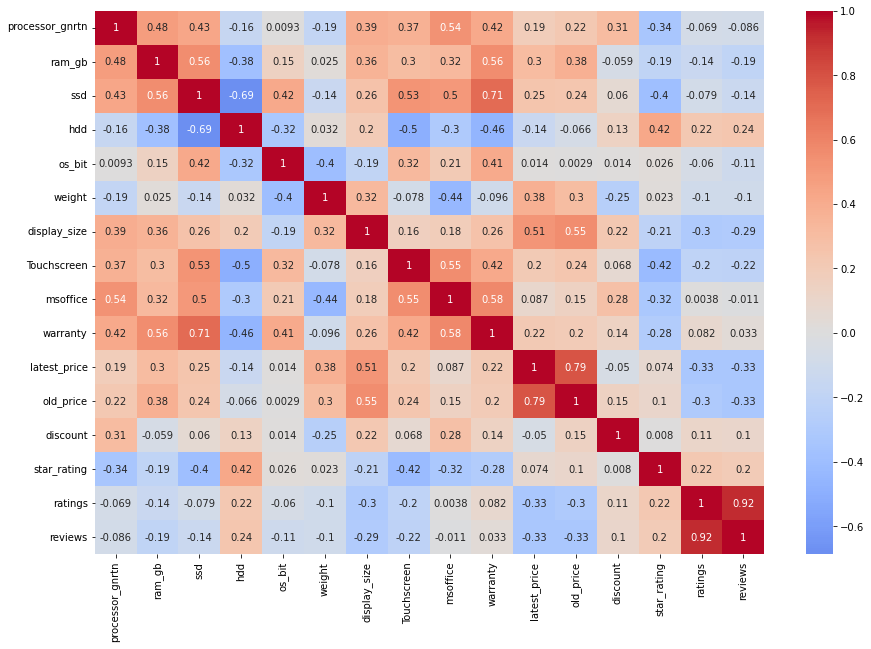

In [94]:
corrs = data_groupby_processor_name.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

#### 3.5 By ram type

In [95]:
data_groupby_ram_type = data.groupby('ram_type')[numeric_features].mean()
data_groupby_ram_type

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
ram_type,,,,,,,,,,,,,,,,
DDR3,7.272727,8.333333,256.000000,128.000000,64.000000,1.583333,14.100000,0.416667,0.250000,0.500000,77939.500000,74231.500000,9.916667,3.783333,135.500000,23.333333
DDR4,10.389587,8.436842,426.989474,237.136842,60.126316,1.709211,15.129165,0.085526,0.343421,0.731579,70955.752632,82252.169737,18.650000,3.032237,380.655263,47.451316
DDR5,10.666667,8.000000,704.000000,64.000000,48.000000,2.000000,16.000000,0.000000,0.000000,0.250000,153490.000000,188241.125000,19.875000,1.062500,1372.000000,148.500000
LPDDR3,9.571429,12.571429,768.000000,0.000000,64.000000,1.714286,15.662500,0.071429,0.285714,0.500000,138870.857143,117761.214286,13.928571,2.278571,9.785714,0.857143
LPDDR4,10.080000,7.111111,42.666667,497.777778,35.555556,1.916667,15.355556,0.000000,0.027778,0.111111,108063.777778,119917.777778,16.083333,3.394444,389.666667,53.833333
LPDDR4X,10.702128,9.636364,634.181818,46.545455,60.606061,1.712121,14.927083,0.484848,0.318182,0.681818,97720.924242,122638.621212,20.833333,2.393939,198.757576,28.363636


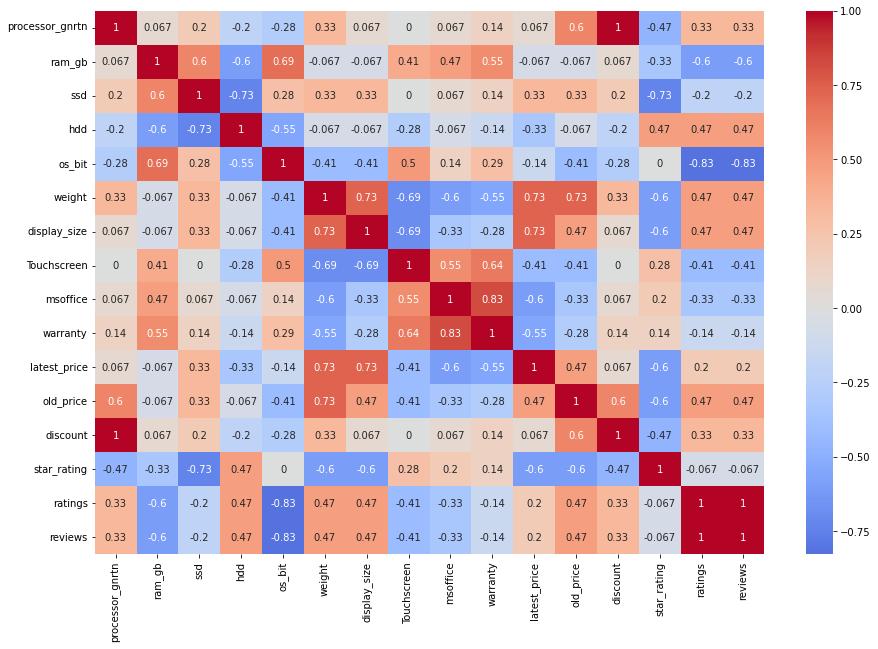

In [97]:
corrs = data_groupby_ram_type.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

#### 3.6 By operation system

In [98]:
data_groupby_os = data.groupby('os')[numeric_features].mean()
data_groupby_os

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
os,,,,,,,,,,,,,,,,
DOS,10.000000,7.000000,17.777778,483.555556,34.666667,1.916667,15.371429,0.000000,0.000000,0.055556,126041.944444,118928.972222,11.944444,3.647222,801.666667,112.027778
Mac,9.928571,12.428571,594.285714,0.000000,64.000000,2.000000,13.900000,0.000000,0.000000,1.000000,151707.857143,163650.000000,7.107143,4.717857,1207.535714,117.535714
Windows,10.370995,8.466346,444.807692,223.384615,60.076923,1.700721,15.180981,0.123798,0.348558,0.709135,71620.558894,84260.287260,19.197115,2.893149,320.326923,40.900240


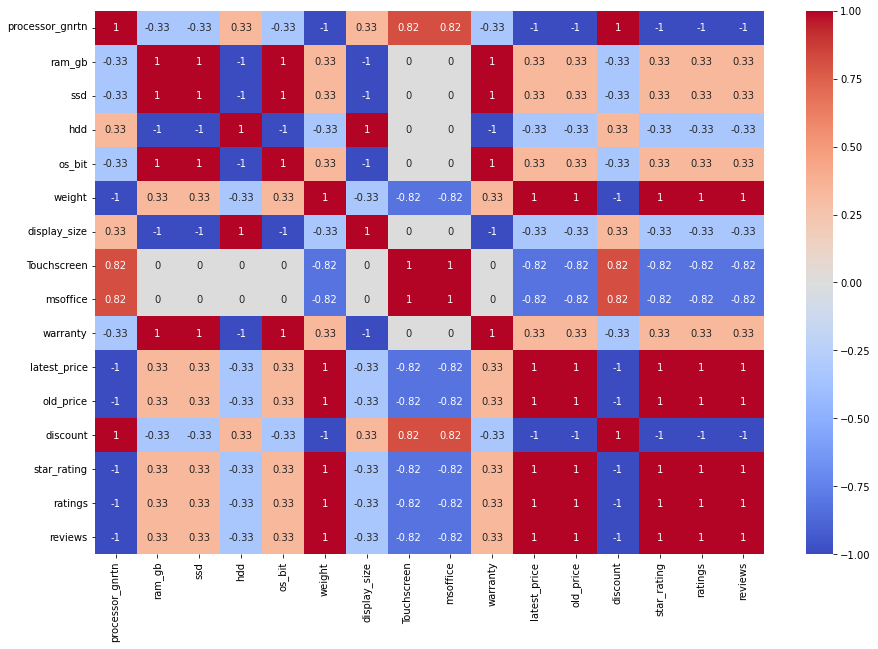

In [99]:
corrs = data_groupby_os.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

## שאריות מקודם

### display size and star ratings 

<AxesSubplot:xlabel='display_size', ylabel='star_rating'>

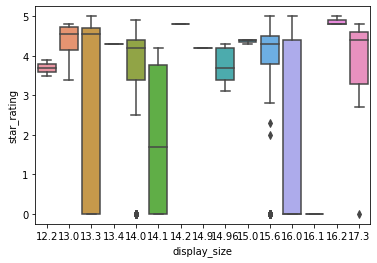

In [57]:
sns.boxplot(data = data, x = 'display_size', y = 'star_rating')

### last price - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='latest_price'>

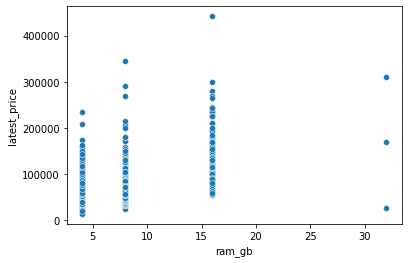

In [58]:
sns.scatterplot(data = data, x = 'ram_gb', y = 'latest_price')

### star rating - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='star_rating'>

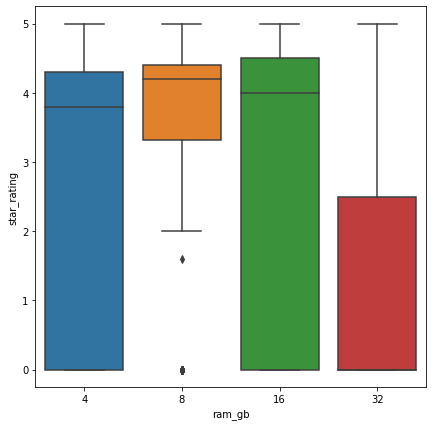

In [59]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data , x = 'ram_gb', y = 'star_rating')

### ratings - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='ratings'>

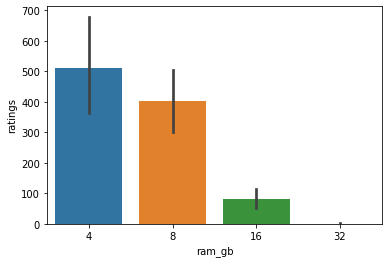

In [60]:
sns.barplot(data = data, x = 'ram_gb', y = 'ratings')

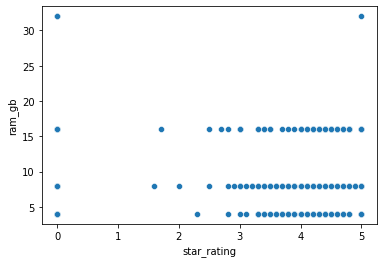

In [61]:
ax = sns.scatterplot(data = data, x = 'star_rating', y = 'ram_gb')

## Catergorial Data - כדי למצוא דברים ספיציפים של הדאטה הקטגורי

In [105]:
categorial_features

['brand', 'model', 'processor_brand', 'processor_name', 'ram_type', 'os']

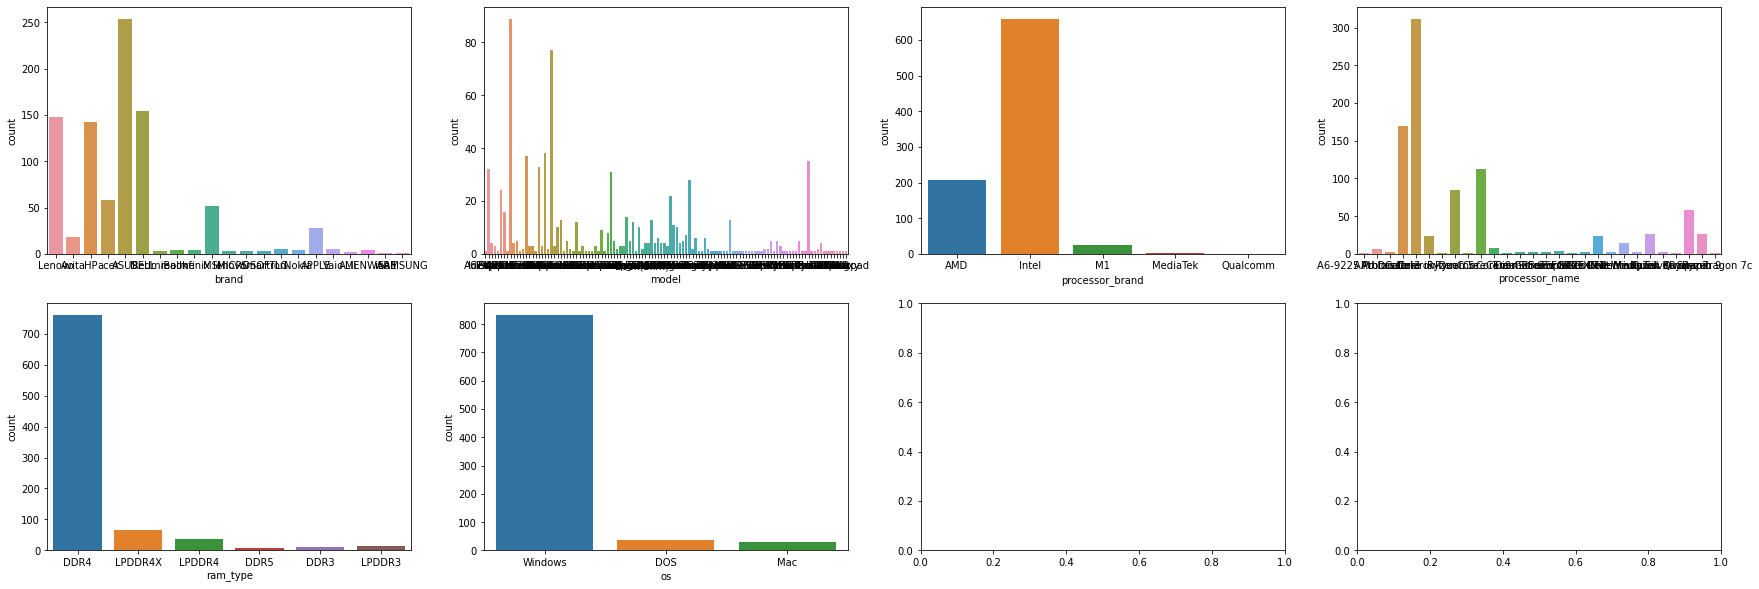

In [104]:
fig, axes = plt.subplots(2,4,figsize=(30,10))
sns.countplot(ax=axes[0,0], x = 'brand', data = data)
sns.countplot(ax=axes[0,1], x = 'model', data = data)
sns.countplot(ax=axes[0,2], x = 'processor_brand', data = data)
sns.countplot(ax=axes[0,3], x = 'processor_name', data = data)
sns.countplot(ax=axes[1,0], x = 'ram_type', data = data)
sns.countplot(ax=axes[1,1], x = 'os', data = data)
plt.show()

#להוריד גרפים!!!

In [106]:
numeric_features

['processor_gnrtn',
 'ram_gb',
 'ssd',
 'hdd',
 'os_bit',
 'weight',
 'display_size',
 'Touchscreen',
 'msoffice',
 'warranty',
 'latest_price',
 'old_price',
 'discount',
 'star_rating',
 'ratings',
 'reviews']

In [107]:
features_for_ramtype = ['ram_type','processor_gnrtn','ram_gb','ssd','hdd','os_bit','weight','display_size','Touchscreen','msoffice','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

In [108]:
pros_ramtype = pd.get_dummies(data[features_for_ramtype])

In [109]:
pros_ramtype.head()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,...,discount,star_rating,ratings,reviews,ram_type_DDR3,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X
0,10.0,4,0,1024,64,1,NaN,0,0,0,...,23,3.7,63,12,0,1,0,0,0,0
1,10.0,4,0,512,64,2,NaN,0,0,0,...,8,3.6,1894,256,0,1,0,0,0,0
2,10.0,4,128,0,64,1,NaN,0,0,0,...,28,3.7,1153,159,0,1,0,0,0,0
3,10.0,4,128,0,64,1,NaN,0,0,0,...,23,3.7,1153,159,0,1,0,0,0,0
4,10.0,4,256,0,64,1,NaN,0,0,0,...,25,3.7,1657,234,0,1,0,0,0,0


<AxesSubplot:>

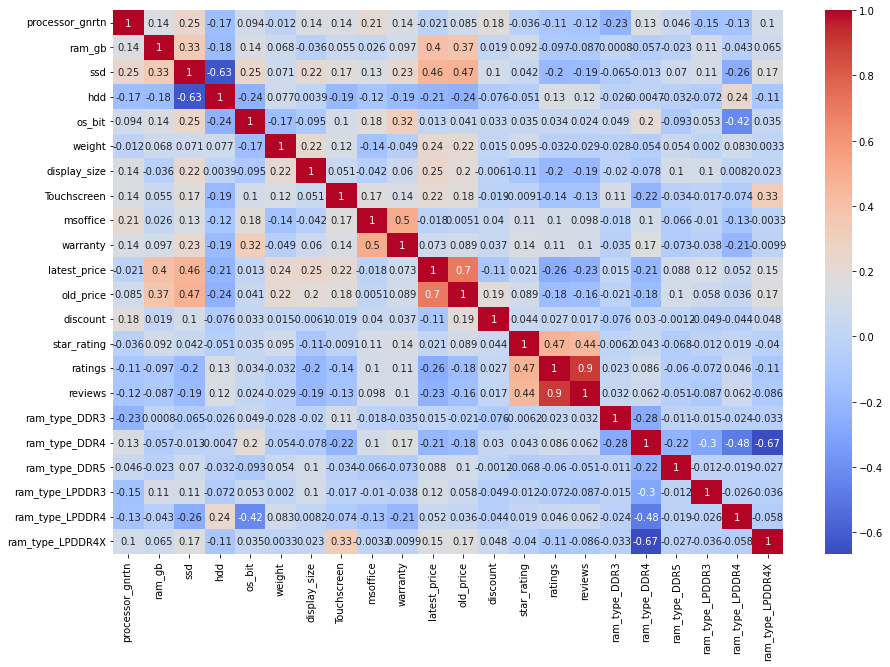

In [110]:
corrs = pros_ramtype.corr(method = 'kendall')
plt.figure(figsize = (15,10))
sns.heatmap(corrs, cmap='coolwarm',annot = True)

נגיד כאן למעלה אפשר לראות קשרים ספיציפים של הרם טייפ לבין כל השאר 